In [3]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
import cv2 as cv2
import random
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers


In [4]:
train_dir = 'dataset/clean-dataset/train'
validation_dir = 'dataset/clean-dataset/validation'
image_size = 224

In [9]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [10]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# 특징차원 = 7*7*512 = 25088
print(7*7*512)
print(224*244*3)

25088
163968


In [38]:
model = models.Sequential()

model.add(vgg_conv)

model.add(layers.Flatten())
model.add(layers.Dense(1025, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1025)              25716225  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1025)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3078      
Total params: 40,433,991
Trainable params: 25,719,303
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_batchsize = 20
val_batchsize = 10

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=3,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=1)

Epoch 1/5
3/3 [==============================] - 11s 4s/step - loss: 1.1679 - accuracy: 0.3167 - val_loss: 1.4349 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 15s 5s/step - loss: 1.1232 - accuracy: 0.3500 - val_loss: 0.8457 - val_accuracy: 0.3333
Epoch 3/5
3/3 [==============================] - 16s 5s/step - loss: 1.1002 - accuracy: 0.3333 - val_loss: 1.1165 - val_accuracy: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 16s 5s/step - loss: 1.0958 - accuracy: 0.3500 - val_loss: 1.0487 - val_accuracy: 0.6333
Epoch 5/5
3/3 [==============================] - 16s 5s/step - loss: 1.1186 - accuracy: 0.3167 - val_loss: 0.9102 - val_accuracy: 1.0000


In [22]:
model.layers[0].name
model.layers[0].trainable

True

In [23]:
for layer in model.layers :
    print(layer.name, layer.trainable)

vgg16 True
flatten_1 True
dense_1 True
dropout_1 True
dense_2 True


In [32]:
for layer in vgg_conv.layers:
    print(layer.trainable)
    layer.trainable = False
model.layers[0].trainable = False  

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [33]:
for layer in vgg_conv.layers:
    print(layer.trainable)   

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [42]:
for layer in model.layers :
    print(layer.name, layer.trainable)

vgg16 False
flatten_3 True
dense_5 True
dropout_3 True
dense_6 True


In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1025)              25716225  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1025)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3078      
Total params: 40,433,991
Trainable params: 25,719,303
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=3,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=1)

Epoch 1/5
3/3 [==============================] - 38s 13s/step - loss: 1.0982 - accuracy: 0.4333 - val_loss: 0.5938 - val_accuracy: 0.9667
Epoch 2/5
3/3 [==============================] - 43s 14s/step - loss: 1.7650 - accuracy: 0.2667 - val_loss: 1.1025 - val_accuracy: 0.7333
Epoch 3/5
3/3 [==============================] - 43s 14s/step - loss: 1.1110 - accuracy: 0.3500 - val_loss: 1.2402 - val_accuracy: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 42s 14s/step - loss: 1.1048 - accuracy: 0.3000 - val_loss: 1.1813 - val_accuracy: 0.3333
Epoch 5/5
3/3 [==============================] - 43s 14s/step - loss: 1.1379 - accuracy: 0.3833 - val_loss: 1.4939 - val_accuracy: 0.0000e+00


In [52]:
model.layers[0].trainable = True
for layer in vgg_conv.layers:
    layer.trainable = True
    
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False    

    
for layer in vgg_conv.layers:
    print(layer.trainable)

vgg_conv.summary()
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________

In [ ]:
#1  : 네트웍 구조만 사용 + 전체 재 학습
model = models.Sequential()
model.add(vgg_conv)
model.add(layers.Flatten())
model.add(layers.Dense(1025, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.summary()


#2  freezing : 네트웍 구조 사용, 필터 레이어의 가중치는 재사용
for l in vgg_conv.layers :
    l.trainable = False
    #  2개의 네트웍을 분리해서 고속으로 학습가능
    
#3  fine tunning  네트웍 구조 사용, 일부 필터(상위) 레이어의 가중치는 재사용
for l in vgg_conv.layers[:-4] :
    l.trainable = False 


# Food 11 사진 분류
- Bread
- Dairy product
- Dessert
- Egg
- Fried food
- Meat
- Noodles/Pasta
- Rice
- Seafood
- Soup
- Vegetable/Fruit

In [55]:
import os
train = ["dataset/food-11/training/" + img for img in os.listdir("dataset/food-11/training")]
val = ["dataset/food-11/validation/" + img for img in os.listdir("dataset/food-11/validation")]
test = ["dataset/food-11/evaluation/" + img for img in os.listdir("dataset/food-11/evaluation")]

In [59]:
print(len(train))
print(len(test))
print(len(val))

9866
3347
3430


In [62]:
img= train[0]
print(img)

dataset/food-11/training/0_0.jpg


In [66]:
v = img.split("/")
print(v)
v2 = v[-1]
print(v2)
print(v2.split('_'))

['dataset', 'food-11', 'training', '0_0.jpg']
0_0.jpg
['0', '0.jpg']


In [67]:
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in val]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in test]

In [69]:
print(train_y[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [71]:
from keras.utils import np_utils
num_classes = 11
y_train = np_utils.to_categorical(train_y, num_classes)
y_val = np_utils.to_categorical(val_y, num_classes)
y_test = np_utils.to_categorical(test_y, num_classes)

In [72]:
print(y_test[2322])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[994, 429, 1500, 986, 848, 1325, 440, 280, 855, 1500, 709]


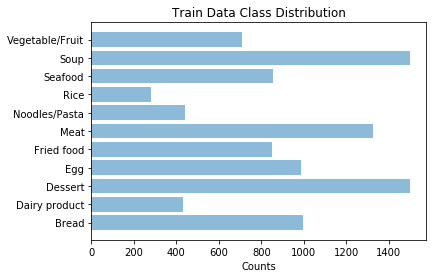

In [75]:
food_classes = ('Bread','Dairy product','Dessert','Egg','Fried food','Meat',
           'Noodles/Pasta','Rice','Seafood', 'Soup', 'Vegetable/Fruit')

y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(0,11)]
print(counts)

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Train Data Class Distribution')

plt.show()

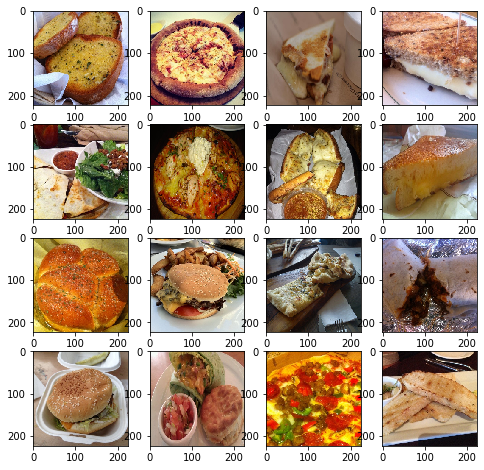

In [76]:
plt.figure(figsize=(8, 8))
k = 0
for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
plt.show()

In [87]:
from keras.applications import imagenet_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def create_features(dataset):    
    x_scratch = []
    i = 0
    for imagePath in dataset:
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)        
        x_scratch.append(image)        
        if  i % 500 == 0 :
            print(i, len(dataset))        
        i += 1
    x = np.vstack(x_scratch)
    return x

In [89]:
train_x = create_features(train)  
val_x = create_features(val)
test_x = create_features(test)

0 9866
500 9866
1000 9866
1500 9866
2000 9866
2500 9866
3000 9866
3500 9866
4000 9866
4500 9866
5000 9866
5500 9866
6000 9866
6500 9866
7000 9866
7500 9866
8000 9866
8500 9866
9000 9866
9500 9866
0 3430
500 3430
1000 3430
1500 3430
2000 3430
2500 3430
3000 3430
0 3347
500 3347
1000 3347
1500 3347
2000 3347
2500 3347
3000 3347


In [94]:
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(9866, 224, 224, 3)
(3430, 224, 224, 3)
(3347, 224, 224, 3)


In [104]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

model_scratch = Sequential()
model_scratch.add(Conv2D(32, (3, 3), activation='relu',input_shape = train_x.shape[1:]))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(128, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(GlobalAveragePooling2D())
model_scratch.add(Dense(64, activation='relu'))
model_scratch.add(Dense(11, activation='softmax'))
model_scratch.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)      

In [105]:
model_scratch.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model_scratch.fit(train_x, y_train, 
          batch_size=32, epochs=1, 
          verbose=1, shuffle=True)

Epoch 1/10
5152/9866 [==============>...............] - ETA: 3:30 - loss: 2.3709 - accuracy: 0.1731

KeyboardInterrupt: 

In [108]:
vgg16 = VGG16(weights="imagenet", include_top=False,input_shape=(image_size, image_size, 3))
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [103]:
%%time
train_features = vgg16.predict(train_x, batch_size=32)    

Wall time: 28min 26s


In [102]:
%%time
test_features = vgg16.predict(test_x, batch_size=32)    

Wall time: 9min 50s


In [99]:
%%time
#val_features = vgg16.predict(val_x, batch_size=32)

In [109]:
model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(100, activation='relu'))
model_transfer.add(Dense(11, activation='softmax'))
model_transfer.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_12 (Dense)             (None, 11)                1111      
Total params: 52,411
Trainable params: 52,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model_transfer.fit(train_features, y_train, batch_size=32, epochs=40,
                    verbose=1, shuffle=True)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(test_features.shape)
preds = np.argmax(model_transfer.predict(test_features), axis=1)
accuracy_score(test_y, preds)

(3347, 7, 7, 512)


0.8556916641768748

In [122]:
import pickle
with open('train_features.bin', 'wb') as f:   pickle.dump(train_features, f)
with open('test_features.bin', 'wb') as f:   pickle.dump(test_features, f)
with open('val_features.bin', 'wb') as f:   pickle.dump(val_features, f)

In [ ]:
with open("train_features.bin","rb") as fr:
    train_features = pickle.load(fr)
with open("test_features.bin","rb") as fr:
    test_features = pickle.load(fr)
with open("val_features.bin","rb") as fr:
    val_features = pickle.load(fr)

In [123]:
model_transfer.save("food11_transfer.h5")

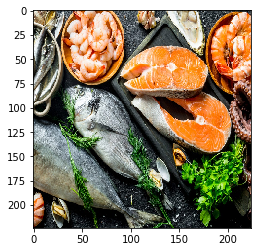

In [138]:
image = load_img('food00.jpg', target_size=(224, 224))
plt.imshow(image)

In [139]:
%%time
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
features = vgg16.predict(image)  
r = np.argmax(model_transfer.predict(features), axis=1)

Wall time: 129 ms


In [141]:
print(food_classes[r[0]])

Seafood


In [147]:
for layer in vgg16.layers[:-9]:
    layer.trainable = False

In [148]:
model_transfer_half = Sequential()
model_transfer_half.add(vgg16)
model_transfer_half.add(GlobalAveragePooling2D())
model_transfer_half.add(Dropout(0.2))
model_transfer_half.add(Dense(100, activation='relu'))
model_transfer_half.add(Dense(11, activation='softmax'))
model_transfer_half.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_16 (Dense)             (None, 11)                1111      
Total params: 14,767,099
Trainable params: 52,411
Non-trainable params: 14,714,688
_________________________________________________________________


In [149]:
model_transfer_half.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
history = model_transfer_half.fit(train_x, y_train, batch_size=32, epochs=10,verbose=1, shuffle=True)

Epoch 1/10
 128/9866 [..............................] - ETA: 27:00 - loss: 21.7502 - accuracy: 0.0859

KeyboardInterrupt: 

In [169]:
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

# Load names of classes
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)
print(len(classes))
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [165]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]  #3개의 yolo layer

# Draw the predicted bounding box
def drawPred(i, classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%d  %s:%s' % (i, classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)

# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    for out in outs:           # 모든 출력층에 대해서 계산
        for detection in out:
            scores = detection[5:]      
            classId = np.argmax(scores)      # 최대 확률값 가져온다.
            confidence = scores[classId]
            if confidence >  0.0:   # 객체확률
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    # nms가 너무 낮으면  겹치는 객체를 감지하지 못함
    # nms가 너무 크면 같은 객체에 대해서 box 많이 사용, 합칠지 말지 결정
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(i, classIds[i], confidences[i], left, top, left + width, top + height)

In [166]:
cap = cv2.VideoCapture('cars.jpg')

hasFrame, frame = cap.read()
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], True, crop=False)

net.setInput(blob)

In [167]:
outs = net.forward(getOutputsNames(net))
postprocess(frame, outs)

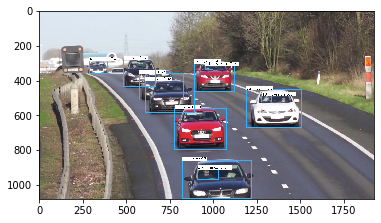

In [168]:
imshow("", frame)

In [159]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    